<p>Before stating with code, we all should know the importance of data as understanding that <em>"data is power"</em>.<br>
in the next section we will give you all some insights, knowledge and lots more about customer leaving or staying by only analyizing and visualizing data.<br>
you all shall now see how some numbers can be so powerfull.<br>

<h1>Importing Packages:</h1><br>
in this section we mainly importing packages we will use in our code, in the following few lines we will demonstrate the usage of each one

1 - matplotlib & seaborn & plotly: matplotlib provides use with visualization tools<br>
2 - pandas : provides use with the tools to import our data and manipulate it<br>
3 - warnings : from its name it is about warning <span>&#128514;</span><br>

In [ ]:
#To work with data frames & arrays
import pandas as pd
import numpy as np

#Visualization & Analysis
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as st

#Preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import *
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from datasist.structdata import detect_outliers
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from scipy import stats

#Models & parameters Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

#Models Evaluation
from scipy.stats import ttest_rel
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score


import warnings
warnings.filterwarnings("ignore")

Obviously, here are loading the data we are going to work with

In [ ]:
df=pd.read_csv("Churn_Modelling - Churn_Modelling.csv")

Churn : is a data set of informtion about customer that we feed the the machine so it can tell use if he/she is going to leave or stay<br>
the Data set consistes of 14 columns with 10 features and one target, in the following we will demo each feature<br>
1 - CreditScore : it represents the creditworthiness of the customer<br>
2 - Geography : is the countery were the customer is currently living<br>
3 - Gender : this obviously the customer gender (female or male) <span>&#128514;</span><br>
4 - Age : the customer age<br>
5 - tenure : period or duration for which the loan amount is sanctioned<br>
6 - Balance : jow much money the customer has<br>
7 - NumOfProducts : is the number of bank retail products the customer uses<br>
8 - HasCrCard : tells whether the customer has creadit card or no<br>
9 - IsActiveMember : the state of activation of the customer<br>
10 - EstimatedSalary : the annual salary of the customer<br>
<br>
<br>
<br>
<br>

Here is a glance on the data

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The statistical describtion of the data

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Summary statistics

* We have total 10K customers record with us.
* Our customer Credit Score ranges from 350 to 850 as maximum
* We have minimum customer's age as 18 years and maximum age of 92 years
* The maximum tenure of any customer with our bank is 10 years
* The customers are using atleast one of our bank product and maximum 4 products
* Alot of customers are holding a credit card and we have customers without any credit card as well.
* Our Customer's Estimated Salaries ranges from 11💵 to 199992 💵 as maximum

Basic information about the data like how much null values in each row<br>
and how many rows and columns are there in the set, also the data type of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


the isnull methos returns the number of missing values in a column  

In [ ]:
df.isnull().values.any()

False

the duplicated method returns the number of duplicated rows

In [ ]:
df.duplicated().any()

False

Here we make a copy of the data so the original data are not effected<br>
the copy method is used for this

In [ ]:
df2 = df.copy()

in the following code we replaced each binary class with a text that describs its meaning as an example the in the exited column we replaced zero with Stayed, so it is now easy to read and understand

In [ ]:
df2 = df2.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

<br>
<br>
<br>
simply in the following code we mapped each binary class to a corresponding label
using the map method
then we renamed column names so it can be more readable

In [ ]:
df2.HasCrCard = df2.HasCrCard.map({0: 'No CreditCard', 1: 'Has CreditCard'})
df2.IsActiveMember = df2.IsActiveMember.map({0: 'Inactive', 1: 'Active'})
df2.Exited = df2.Exited.map({0: 'Stayed', 1: 'Exited'})
df2.rename(columns={'Exited':'Status'},inplace = True)
df2.rename(columns={'HasCrCard':'CreditCard'},inplace = True)
df2.rename(columns={'IsActiveMember':'Activity'},inplace = True)

In [ ]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1,Has CreditCard,Active,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No CreditCard,Active,112542.58,Stayed
2,502,France,Female,42,8,159660.80,3,Has CreditCard,Inactive,113931.57,Exited
3,699,France,Female,39,1,0.00,2,No CreditCard,Inactive,93826.63,Stayed
4,850,Spain,Female,43,2,125510.82,1,Has CreditCard,Active,79084.10,Stayed


this code below is responsable for plotting how features are distributed over the number of customers

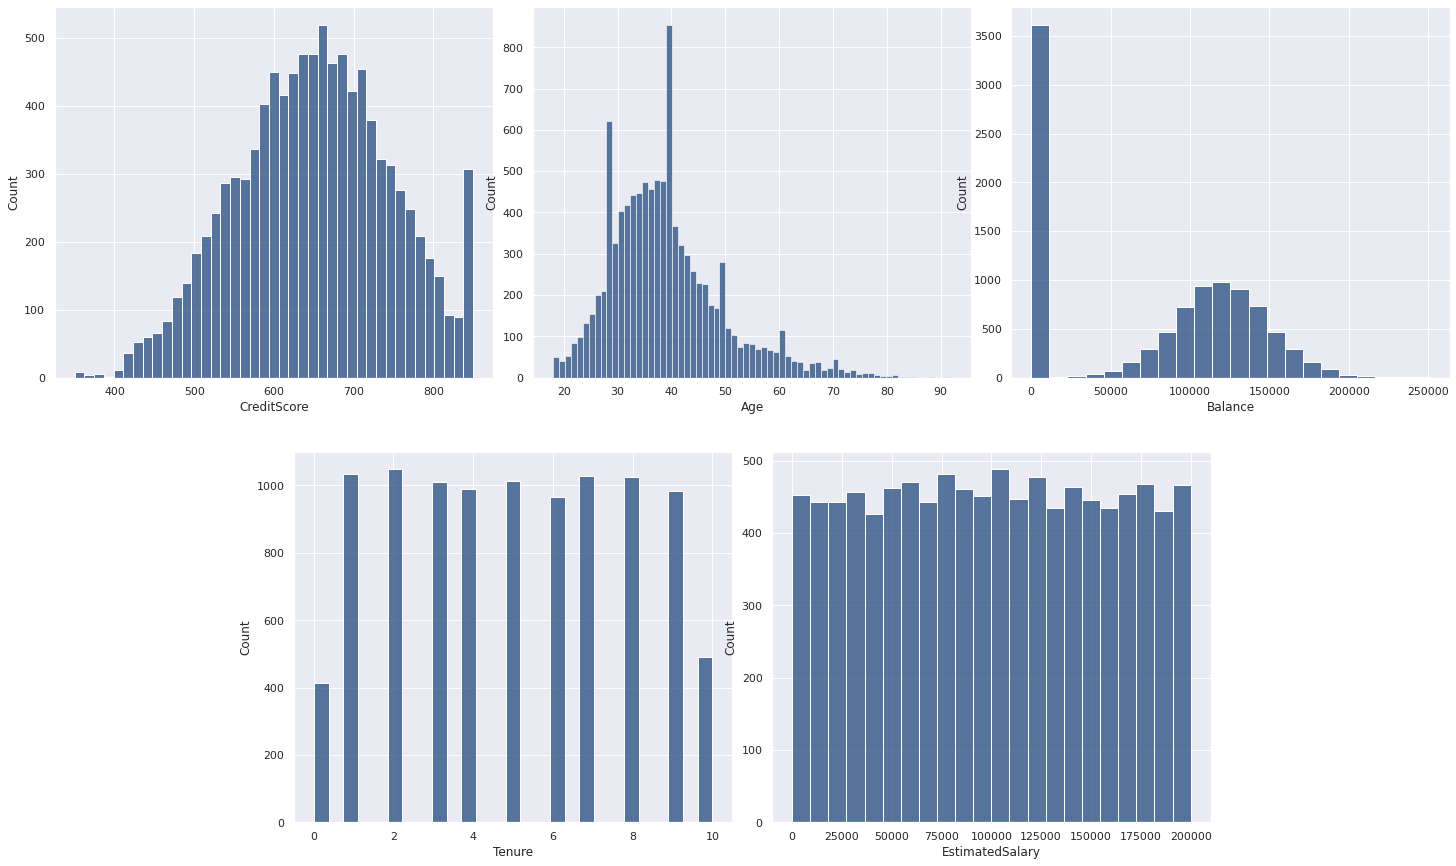

In [ ]:
# Distributions
sns.set(rc={'figure.figsize':(25,15)})
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
sns.set_theme(palette="crest_r")
sns.histplot(data = df,x = "CreditScore",ax=ax1)
sns.histplot(data = df,x = "Age",ax=ax2)
sns.histplot(data = df,x = "Balance",ax=ax3)
sns.histplot(data = df,x = "Tenure",ax=ax4)
sns.histplot(data = df,x = "EstimatedSalary",ax=ax5)

so in the first three we can see that the distribution in a billmber of cun curve (Gaussian distribution), how ever the second two are not seamingly bill curve like.

### **Highlights:**


*   Credit Score : Normally distributed with mean 650 ranges between 400 and 830
*   Age : Majority of customers ages range between 29 and 40 years old 
*   Balance : Majority of customers are normally distributed except around 3600 customer have ZERO bank balance
*   Estimated Salary of our customers are uniformly distributed means we have around the same number of customers for all different estimated salaries.



<br>
<br>
<br>
<br>

<h1><em>Let's dive more deeper in the data</em></h1>

let's plot the number customer per geographical regone. <br>
<h4>How ?</h4><br>
first you need to know how many customer are there in each class, this is done in line 2 by making the values list
in which we got the number of customer using the count methode.
then we plot it in a pie shape using plotly visualization package "<code>import plotly.graph_objects as go</code>"

In [ ]:
labels = ['Germany','France','Spain']
values = [df.Geography[df['Geography']=='Germany'].count(),df.Geography[df['Geography']=='France'].count(),df.Geography[df['Geography']=='Spain'].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0])])
fig.update_layout(title='Geography')
fig.show()

regardless of how beautiful it is, we can see that 50.1% customers are in France, 25.1% in Germany and 24.8% are in Spain<br>
<h4>How does this help ?</h4>
i will tell you how it help, looking the percentage of customers in span and germany we can see that we need to do more effort there.

**Most customers are from France**




<br>
<br>
<br>
in the following code we simply how many customer in each gender 

In [ ]:
px.pie(df, names='Gender',hole=0.5 , title = 'Gender')

looking to the pie we see that most of the customers are males but the ratio between both gender is not the great deal

here we done the same like the geography but now the categories are the products

In [ ]:
labels = ['1 Product','2 Product','3 Product','4 Product']
values = [df.NumOfProducts[df['NumOfProducts']==1].count(),df.NumOfProducts[df['NumOfProducts']==2].count(),df.NumOfProducts[df['NumOfProducts']==3].count(),df.NumOfProducts[df['NumOfProducts']==4].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(hole=0.5,labels=labels, values=values, pull=[0, 0, 0.2,0.4])])
fig.update_layout(height= 700, title='Number of Products')

fig.show()

looking to the graph it is clear that the bank need to encourage the customers to use more products
as most of the customers are using one or two products, and very much less customers are using three or four products

<br>
<br>
<br>
<br>
in the following chart we are plotting the number of customer in each class of Active feature and creditCard feature as a hist

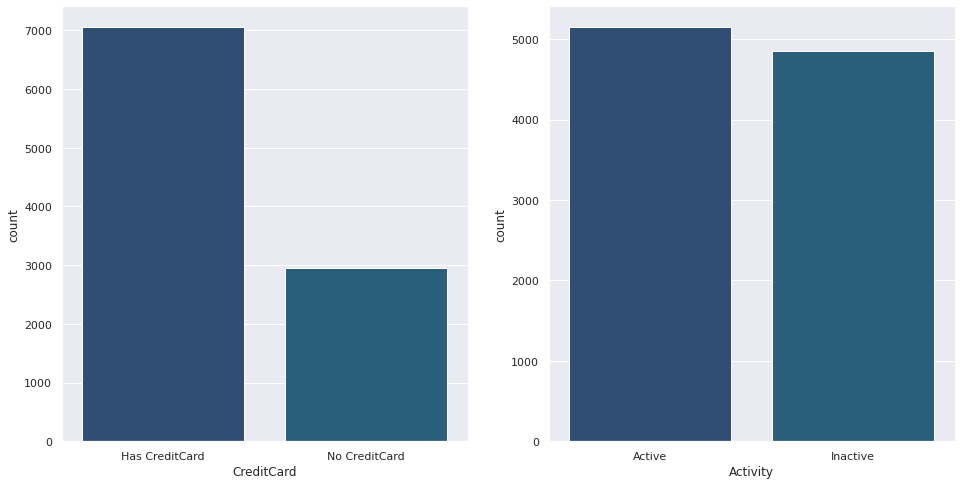

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
fig,axs = plt.subplots(1,2)
sns.set_theme(palette="crest_r")
sns.countplot(data = df2,x = "CreditCard",ax=axs[0])
sns.countplot(data = df2,x = "Activity",ax=axs[1])

looking the charts we see that most of customers has creadit card which is a good thing but there are many customers that don't use it so bank might consider doing more marketing<br>
also the number of inactive customers is large and this is a problem the managment sector should consider, however, number of active customer is larger

<br>
<br>
<br>
<br>
in the following code we plot hoe many users exit or stayed 
using the same method as with geography to get the list of user counts per class

In [ ]:
labels = ['Exited','Stayed']
values = [df2.Status[df2['Status']=='Exited'].count(),df2.Status[df2['Status']=='Stayed'].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0])])
fig.update_layout(title='Status')
fig.show()

**~80% of customers stay at the bank**


<br>
<br>
<br>
here we will plot the creadit score of customer separately based on there status, so we will see that the customer who wxited in a different colour from those who stayed

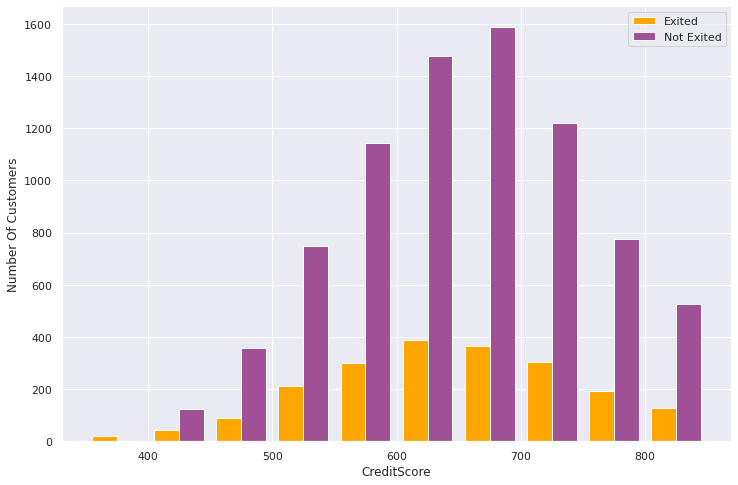

In [ ]:
#getting the ceadit score of the people who exited
CreditScore_Exited = df[df.Exited == 1].CreditScore
#getting the ceadit score of the people who stayed
CreditScore_NotExited = df[df.Exited == 0].CreditScore
plt.figure(figsize=(12,8)) 
plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.hist([CreditScore_Exited,CreditScore_NotExited],label=['Exited','Not Exited'], color=['#ffa600', '#a05195'])
plt.legend()

In [ ]:
px.histogram(df2, x='CreditScore', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Credit Score and Status')

**By looking at the credit Score it is hard to tell whether the customer tends to Exit or not because the behaviour are almost same for both. So Credit Score can't be considered as a perfect Feature.**


---
##### We have 19 customers who had less than a 400 credit score and exited the bank.






<br>
<br>
<h1>Now we go more deeper</h1>

now we go more complex and plot relation between greograph and status

In [ ]:
fig = px.sunburst(df2, path=['Geography', 'Status'],title= 'Relation between Geography and Status')
fig.update_traces(textinfo='label + percent parent')

so we see that the ratio between the exited customer and customers per countery is the smallest in France then Spain and the heighest is Germany<br>
what is wrong with German people!

**Germany has the highest percentage of exited customers and France has the highest percentage of staying customers.**




<br>
<br>
lets do the same but for Gender and status

In [ ]:
fig = px.sunburst(df2, path=['Gender', 'Status'],title= 'Relation between Gender and Status')
fig.update_traces(textinfo='label + percent parent')

from the chart we see that the ratio between female how left is heigher than males how left 

**Males tend to stay at the bank more than Females**

lets look at the relation between age and status

In [ ]:
px.histogram(df2, x='Age', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Age and Status')

**Age shows significant difference in order to identify the customer churn, The oldest customers tends to churn more as compared to young ones.**


In [ ]:
px.box(df2, x='Tenure', color='Status',title= 'Relation between Tenure and Status')

The box plot shows that customers stay at the bank for between 3 and 7 years.
The customers who exited the bank stayed for 2 to 8 years.

**The behaviour are almost same for both. So Tenure can't be considered as a perfect Feature.**


In [ ]:
px.histogram(df2, x='Balance', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Balance and Status')

The graph is normally distributed.

**The behaviour are almost same for both. So Balance can't be considered as a perfect Feature.**


now we see relation between number of products and status

In [ ]:
fig = px.sunburst(df2, path=['NumOfProducts', 'Status'],title= 'Relation between Number of Products and Status')
fig.update_layout(height= 700)
fig.update_traces(textinfo='label + percent parent')

**We see that half the customers subscribe to only 1 product, and the rest mostly subscribe to 2 products (a small fraction subscribe to 3 and 4 products). But while 28% of the customers subscribing to only 1 product exit, only 8% of those subscribing to 2 products do so. So, we see that the number of products is a perfect feature to use.**

now we see relation between hasCreditCard and status

In [ ]:
fig = px.sunburst(df2, path=['CreditCard', 'Status'],title= 'Relation between Credit Card and Status')
fig.update_traces(textinfo='label + percent parent')

****We have almost the same ratio of customer churn in both cases.****

now we see relation between number of Activity and status

In [ ]:
fig = px.sunburst(df2, path=['Activity', 'Status'],title= 'Relation between Activity and Status')
fig.update_traces(textinfo='label + percent parent')

**Inactive customers tend to exit the bank almost 2 times the active customers.**

In [ ]:
px.histogram(df2, x='EstimatedSalary', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Estimated Salary and Status')

**Estimated Salary shows same behavoiur for both status**



let's see the spermann correlation to see with features are related the most to the target

In [ ]:
# Correlations among columns
corr=df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004187,0.005130,0.000476,-0.006934,-0.009013,0.008305,0.000599,0.012044,-0.006007,-0.016571
CustomerId,0.004187,1.000000,0.005967,0.008775,-0.015072,-0.013932,0.019297,-0.014023,0.001682,0.015246,-0.006264
CreditScore,0.005130,0.005967,1.000000,-0.007974,0.001133,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289
Age,0.000476,0.008775,-0.007974,1.000000,-0.010405,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968
Tenure,-0.006934,-0.015072,0.001133,-0.010405,1.000000,-0.009513,0.012908,0.022354,-0.028673,0.007778,-0.013978
Balance,-0.009013,-0.013932,0.005687,0.033304,-0.009513,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110
NumOfProducts,0.008305,0.019297,0.012568,-0.058566,0.012908,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282
HasCrCard,0.000599,-0.014023,-0.003802,-0.015278,0.022354,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138
IsActiveMember,0.012044,0.001682,0.024262,0.039839,-0.028673,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128
EstimatedSalary,-0.006007,0.015246,0.001237,-0.002431,0.007778,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081


Text(0.5, 1.0, 'correlation')

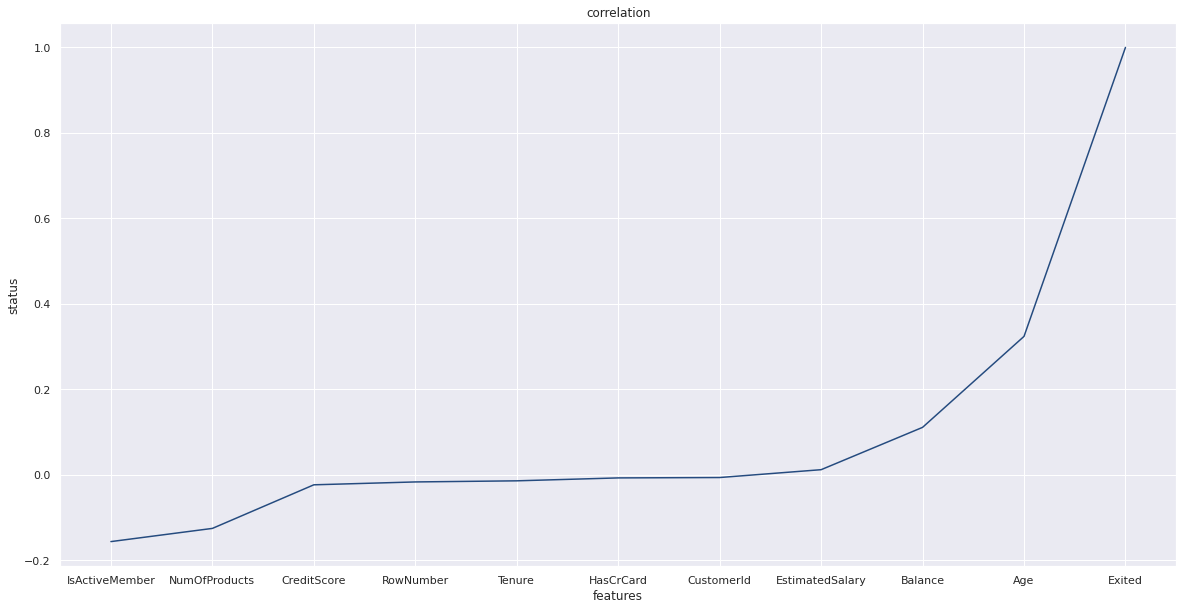

In [ ]:
Exited_relation = corr["Exited"].sort_values(ascending=True)
plt.figure(figsize=(20, 10))
plt.plot(Exited_relation)
plt.xlabel("features")
plt.ylabel("status")
plt.title("correlation")


now it is easy to say that Salary, Balance and Age are closely related to status

**As shown in the correlation plot that Age was related to Exited Status.**

In [ ]:
df2.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.0,1,Has CreditCard,Active,101348.88,Exited


## Insights from EDA:
Based on our EDA the features that drive this process or an important one to identify customers churns are :
* Geography
* Gender
* Age
* NumOfProducts
* Activity






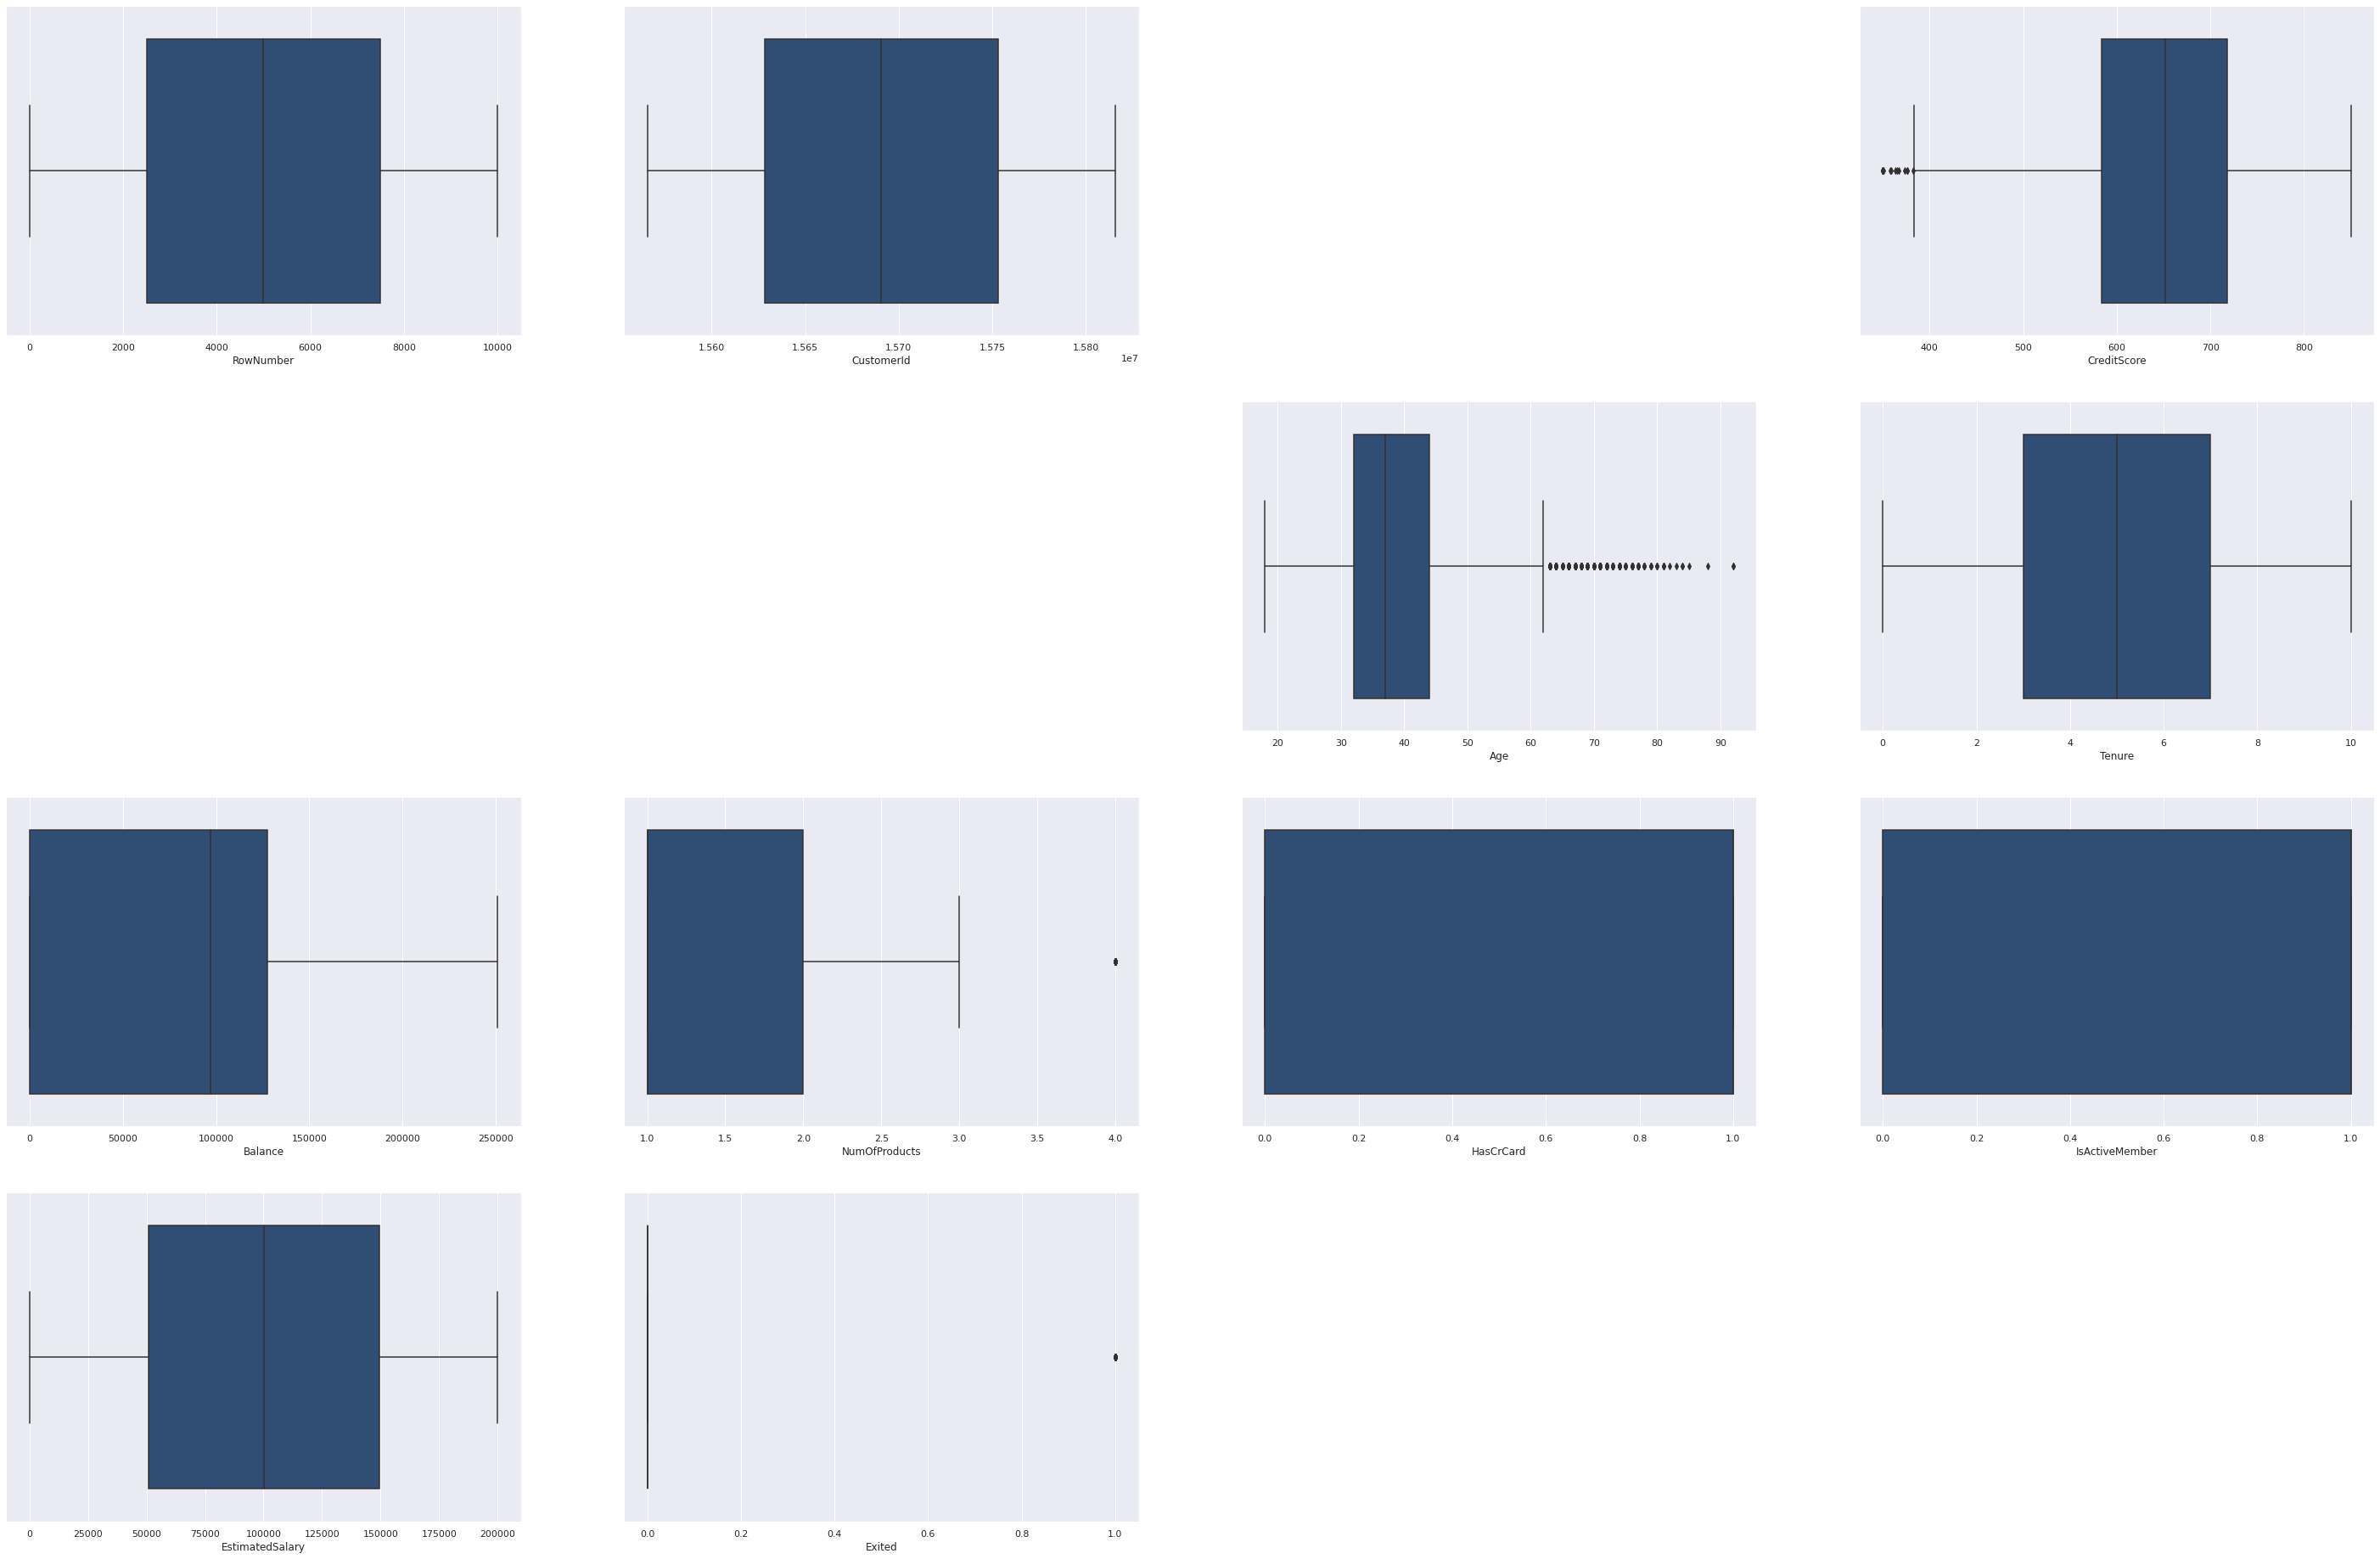

In [ ]:
#checking outlires
fig = plt.figure(figsize=(50,50))
for index,col in enumerate(df.columns):
  if df.loc[:,col].dtype.kind in 'iufc':
    plt.subplot(6,4,index+1)
    sns.boxplot(df.loc[:,col])


<br>
<br>
<br>
<br>
<br>
<h4>Now after we visualized and analized the Data, let's go preprocess it so the model then can work with it</h4>
<h1>Preprocessing</h1>

first let's rome those columns we won't use

In [ ]:
data = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

previously when we analyzied the data we found that there were some values that were object type, this is a problem as tree works only with numarical data.
<h4>So, What do we do now ?</h4>
simply we will just encode these object type featues into numbers so the model algorithm works well with it.

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


here now we know that Geography and Gender are object type so we will now encode them all to numbers

<h1>How do we do it?</h1>
it is easy we will only use LabelEncoder from sklearn.preprocessing

In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

in this part we will incode Geography to one hot encoding as it is many  categories

we will use the lable Binarizer which returns a one hot matrix of features

In [ ]:
from sklearn.preprocessing import LabelBinarizer
jobs_encoder = LabelBinarizer()
jobs_encoder.fit(data["Geography"])
transformed = jobs_encoder.transform(data["Geography"])
ohe_df = pd.DataFrame(transformed)
data = pd.concat([data, ohe_df], axis=1).drop(["Geography"], axis=1)

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1




#covariance


now let's have a look at the covariance between those attributes

as visualized data is easy to understand let's look to the covariance like a heat map

['CreditScore' 'Gender' 'Age' 'Tenure' 'Balance' 'NumOfProducts'
 'IsActiveMember' 'EstimatedSalary' 'Exited' 0 1]


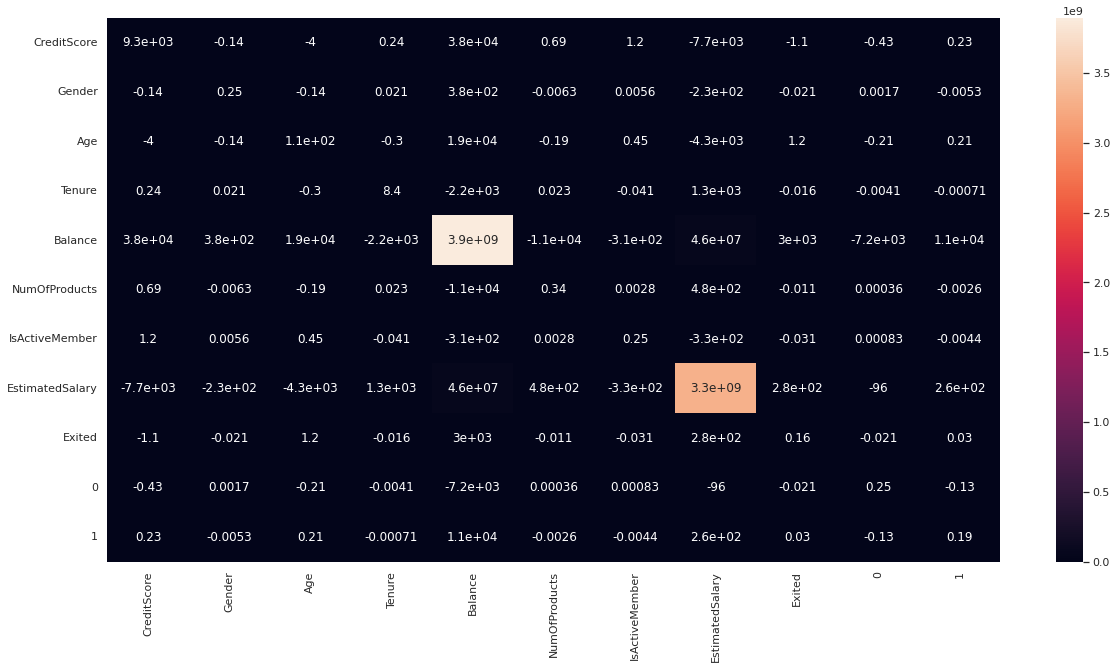

In [ ]:
#Get the covariance between the data
covar = data.cov()

# Top covariance training features with the diagnosis
top_feature = covar.index[abs(covar['Exited']) >= 0.01]

# Top Features Affecting the Value of Diagnostics
print(top_feature.values)


#Dealing with high-quality features only
Important_Data =data[top_feature.values]

# plotting The covariance as a heat map
plt.subplots(figsize=(20, 10))
top_covar = data[top_feature].cov()
sns.heatmap(top_covar, annot=True)
plt.show()

#P_VALUE
The validity of the relationship between the features and the The label[Exited] must be confirmed by p_value


#Good P_VALUE <= 0.05  "It does not come by chance"

In [ ]:
P_value = pd.DataFrame (columns = ['Correlation','P_Value'])
for col in data:
  r, p = stats.pearsonr(data['Exited'],data[col])
  P_value.loc[col] = [round(r,3),round(p,3)]

In [ ]:
P_value.head(data.shape[0])

,Correlation,P_Value
CreditScore,-0.027,0.007
Gender,-0.107,0.000
Age,0.285,0.000
Tenure,-0.014,0.162
Balance,0.119,0.000
NumOfProducts,-0.048,0.000
HasCrCard,-0.007,0.475
IsActiveMember,-0.156,0.000
EstimatedSalary,0.012,0.226
Exited,1.000,0.000


<br>
<br>
<br>
now let's divide our data to X, y that means features and targets

to obtain X we only droped the Exited column which is also the target

In [ ]:
X = data.drop(['Exited'],axis=1)
Y = data.Exited

lets se how X, y look like

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

<h4>Dealing with unbalanced data</h4>

lets see how many values in each class of the target vector using the count method

In [ ]:
class1 = Y[Y==1].count()
class2 = Y[Y==0].count()
print(class1)
print(class2)

2037
7963


as we saw the data is clearly impalanced

lets se if a XGBoost Classifier will do good with it.

In [ ]:

#best model before Data balance
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)
model=XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=8, random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Testing accuracy: '+(str(accuracy)))
print(classification_report(Y_train,  model.predict(X_train)))
print(classification_report(Y_test,  model.predict(X_test)))

Testing accuracy: 0.8535
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6356
           1       1.00      0.96      0.98      1644

    accuracy                           0.99      8000
   macro avg       0.99      0.98      0.99      8000
weighted avg       0.99      0.99      0.99      8000

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



it did good 

now let's use anaother model like GradientBoost and see what happens

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)
model=GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_train,  model.predict(x_train)))
print(classification_report(y_test,  model.predict(x_test)))

0.8665
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6356
           1       0.96      0.74      0.84      1644

    accuracy                           0.94      8000
   macro avg       0.95      0.87      0.90      8000
weighted avg       0.94      0.94      0.94      8000

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



it also did good but we will solve the balance problem

we will do over sampling and under sampling using SMOTE and RandomUnderSampler

In [ ]:
oversample = SMOTE()
undersample = RandomUnderSampler()

steps = [("o",oversample), ("u",undersample)]
pipline = Pipeline(steps = steps)
X,Y = pipline.fit_resample(X,Y)

In [ ]:
class1 = Y[Y==1].count()
class2 = Y[Y==0].count()
print(class1)
print(class2)

7963
7963


now as we saw the data is perfectly balanced

let's visiualize it to be more clear

In [ ]:
labels = ['Exited','Stayed']
values = [class1,class2]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0])])
fig.update_layout(title='Status')
fig.show()

so after Preprocessing and all that stuf let's perceed to the finaly by creating models that will be ready to debloy

in the next cell we splitted thae data to train and test part: train is for training the model and test is for evaluation<br>
we used train_test_split() from sklearn.model_selection, also we now have a 20% percent of our data for testing and 80% for training the models

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20)

In [ ]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
13555,764,1,34,6,108760.270000,2,1,0,166324.790000,0,1,0
1665,768,1,42,5,0.000000,3,0,0,60686.400000,1,0,0
14878,627,0,56,7,145731.184874,1,0,0,175748.465624,1,0,0
7471,638,0,36,6,0.000000,1,1,0,164247.510000,1,0,0
2582,652,1,37,7,0.000000,2,1,0,68789.930000,0,0,1



#Feature Scaling

#The data is ready to train & test the model

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(12740, 12)
(12740,)
(3186, 12)
(3186,)


DecisionTree Classifier is one of th most used machine learning algorithms used today as it is accurate, not affected by outliers, does not need scalling and lot more<br>
Decision Trees are like rule based systems but instead of telling it the rules it descovers them itself.

the next cell we will craet, train(fit) and test an model to see how accurate it is

Decision tree here have max depth of 10 and uses entropy insteadof gini

Training time : 0.09127378463745117 Seconds
Testing accuracy   : 85.15379786566227 %
MSE [TEST]          : 0.14846202134337727
Training accuracy  : 90.02354788069073 %
MSE [TRAIN]         : 0.09976452119309262
precision :  0.850632911392405
recall    :  0.8500948766603416
f1_score  :  0.8503638089212273


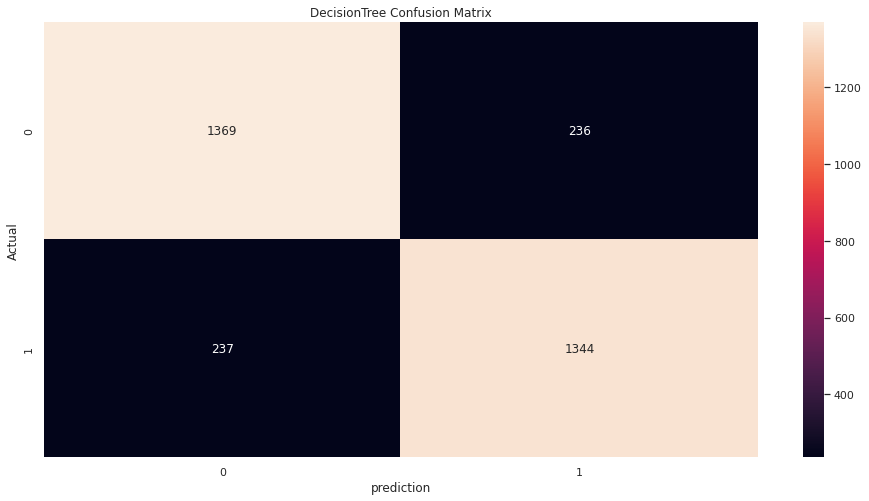

In [ ]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
#Model
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)

#Training
time_1 = time.time()
tree.fit(x_train, y_train)
time_2 = time.time()



#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
tree_predict = tree.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = tree.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.show()

from the previous output we can clearly see that this model a good accuracy, recall and precision also a low loss(MSE) and wasn't overfitted

<h4>The Random Forest Classifer</h4>

we will do the same as DTC but we will use more parameters to prevent overfitting like max_depth which describes the maximum depth the tree can reach, max_features: the maximum number of features a node needs to split, min_samples_split: minimunm number of samples need for splitting, n_estimators : the number of trees used in the forest)

Training time : 1.0944762229919434 Seconds
Testing accuracy    : 86.06403013182674 %
MSE [TEST]          : 0.1393596986817326
Training accuracy   : 89.84301412872841 %
MSE [TRAIN]         : 0.10156985871271586
precision :  0.8689162881245944
recall    :  0.846932321315623
f1_score  :  0.8577834721332479


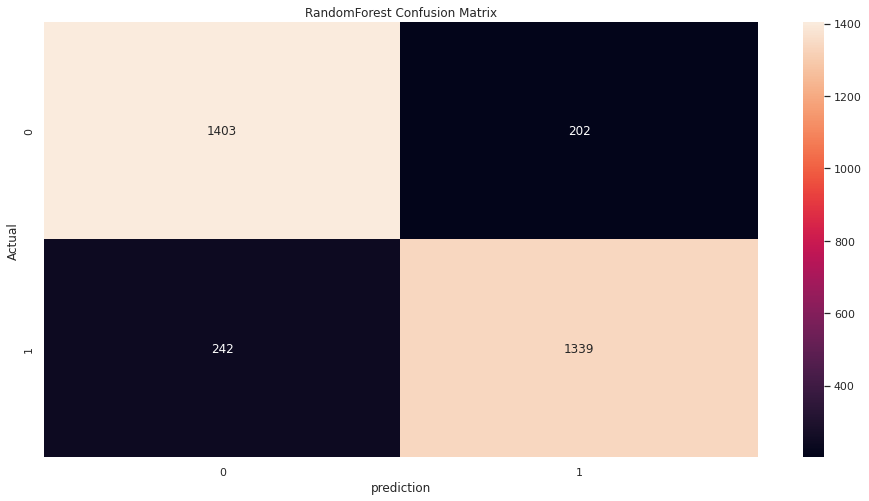

In [ ]:

RF1_model = RandomForestClassifier(max_depth=9, max_features=7, min_samples_split=6,n_estimators=50, random_state=42)

time_1 = time.time()
RF1_model.fit(x_train, y_train)
time_2 = time.time()

#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
tree_predict = RF1_model.predict(x_test)
print("Testing accuracy    :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = RF1_model.predict(x_train)
print("Training accuracy   :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()


<h4>The XGBoost Classifer</h4>

here we start with boosting algorithms, with is another type of the tree based algorithms here we see two new three new parameters the gamma : controls the minimum reduction in the loss function required to grow a new node in the tree. Learning_rate: learning rate of gradient based optimization, min_child_weight: if the weight of a node is less than this value node will split

Training time : 1.410806655883789 Seconds
Testing accuracy   : 87.82172002510985 %
MSE [TEST]          : 0.12178279974890144
Training accuracy  : 95.39246467817897 %
MSE [TRAIN]         : 0.04607535321821036
precision :  0.8806636885768986
recall    :  0.872865275142315
f1_score  :  0.8767471410419314


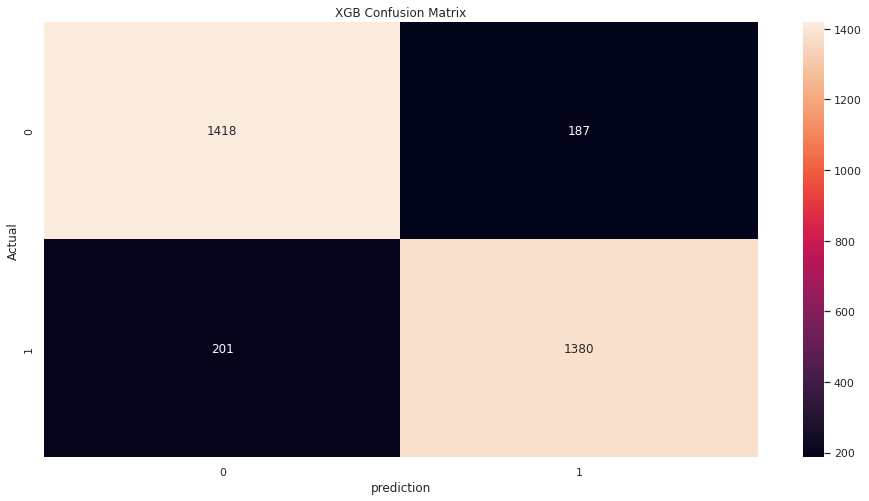

In [ ]:
xgb_model = XGBClassifier(random_state=42,gamma= 0.001,learning_rate= 0.3,max_depth= 6,min_child_weight= 1,n_estimators=100)

time_1 = time.time()
xgb_model.fit(x_train, y_train)
time_2 = time.time()



#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
tree_predict = xgb_model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = xgb_model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()

<h1>GradientBoosting</h1>

one more importent parameter is subsample : the percentage of rows used per building a new tree

Training time : 13.90526294708252 Seconds
Testing accuracy   : 87.69617074701821 %
MSE [TEST]          : 0.12303829252981795
Training accuracy  : 90.02354788069073 %
MSE [TRAIN]         : 0.09976452119309262
precision :  0.8857884490590525
recall    :  0.8633776091081594
f1_score  :  0.874439461883408


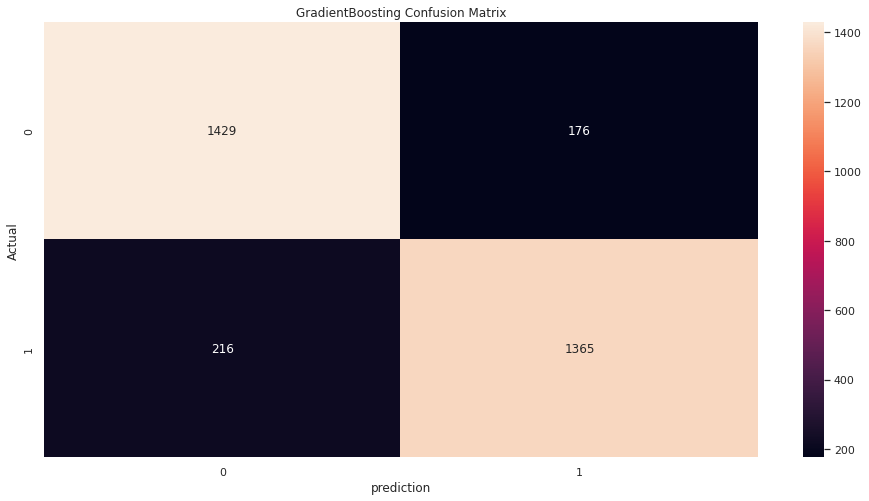

In [ ]:
model=GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)

time_1 = time.time()
model.fit(x_train, y_train)
time_2 = time.time()


#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
y_pred = model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, y_pred))

y_pred1 = tree.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, y_pred1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, y_pred1))


print("precision : ",precision_score(y_test, y_pred))
print("recall    : ",recall_score(y_test, y_pred))
print("f1_score  : ",f1_score(y_test, y_pred))

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('GradientBoosting Confusion Matrix')
plt.show()

<h1>LGBM</h1>

Training time : 1.2817130088806152 Seconds
Testing accuracy   : 87.16258631512869 %
MSE [TEST]          : 0.12837413684871313
Training accuracy  : 90.21193092621664 %
MSE [TRAIN]         : 0.09788069073783359
precision :  0.8805194805194805
recall    :  0.857685009487666
f1_score  :  0.8689522588913811


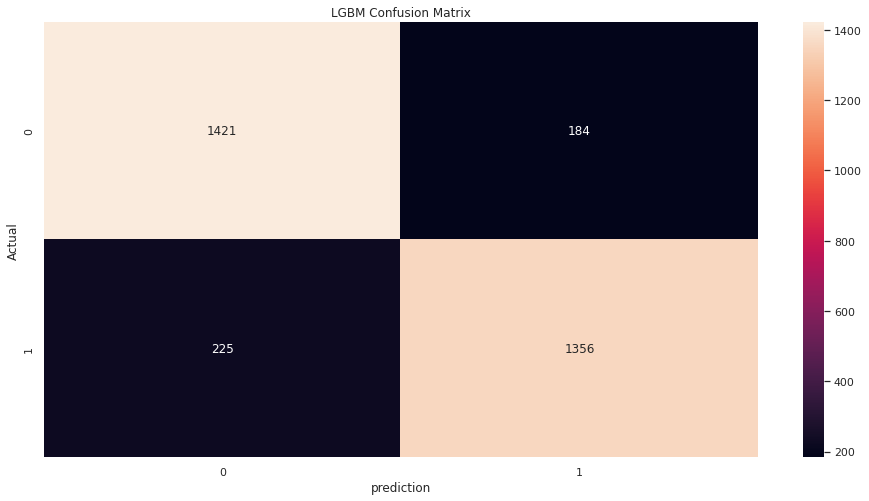

In [ ]:
LGB=LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)

time_1 = time.time()
LGB.fit(x_train, y_train)
time_2 = time.time()



#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
y_pred = LGB.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, y_pred))

y_pred1 = LGB.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, y_pred1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, y_pred1))


print("precision : ",precision_score(y_test, y_pred))
print("recall    : ",recall_score(y_test, y_pred))
print("f1_score  : ",f1_score(y_test, y_pred))

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('LGBM Confusion Matrix')
plt.show()

<h1>CatBoost</h1>

catboost is a itrative machine learning algorithm

Training time : 1.2817130088806152 Seconds
Testing accuracy   : 88.32391713747646 %
MSE [TEST]          : 0.1167608286252354
Training accuracy  : 93.22605965463109 %
MSE [TRAIN]         : 0.06773940345368917
precision :  0.8892466194462331
recall    :  0.8734977862112587
f1_score  :  0.8813018506700702


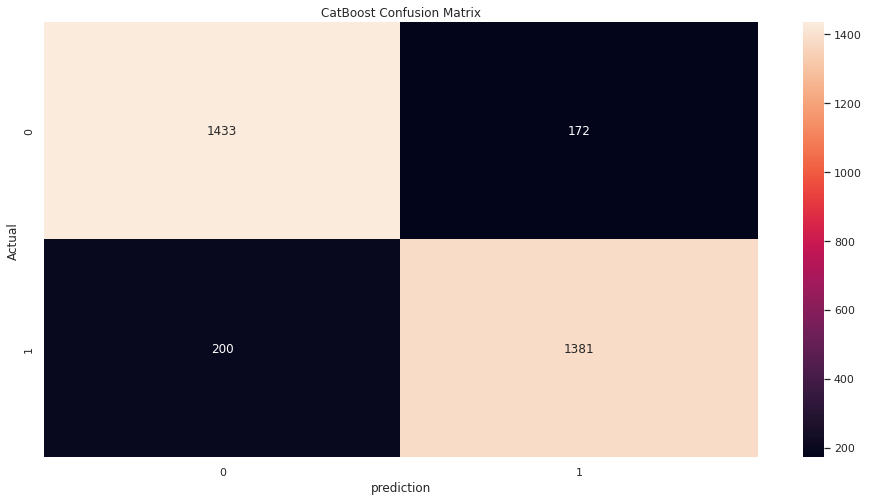

In [ ]:
CatB=CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)

CatB.fit(x_train, y_train)

#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
y_pred = CatB.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, y_pred))

y_pred1 = CatB.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, y_pred1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, y_pred1))


print("precision : ",precision_score(y_test, y_pred))
print("recall    : ",recall_score(y_test, y_pred))
print("f1_score  : ",f1_score(y_test, y_pred))

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()


<h1>after we saw the models we now shall see how we rached those best parameters<h1>

for this we will use the grideSearch which is an exhustive algorithm which means that it will try every posible combination of parameters to reach the heighest accuracy

for the following section we have a list of posible parameters calles grid that we give to gridSearch to try on the models like param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
here the model try to find the best combination like [gamma:0.1, min_child_weight:10, ...] and so on then it will fit the model with those parameters

# **XGBoost Gridsearch**

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_model = XGBClassifier(random_state=42)
xgb_model = GridSearchCV(estimator=xgb_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


y_pred = xgb_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))
print("roc_auc score",roc_auc_score(y_test, y_pred))
print(xgb_model.best_params_)
print(xgb_model.best_estimator_)
print(classification_report(y_train,  xgb_model.predict(x_train)))
print(classification_report(y_test,  xgb_model.predict(x_test)))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
testing accuracy 0.8907721280602636
F1 score:  0.8895939086294417
roc_auc score 0.8907422842516566
{'gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=8, random_state=42)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6358
           1       1.00      0.99      0.99      6382

    accuracy                           0.99     12740
   macro avg       0.99      0.99      0.99     12740
weighted avg       0.99      0.99      0.99     12740

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1605
           1       0.89      0.89      0.89      1581

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



# **GradientBoosting Gridsearch** 

In [ ]:
param_grid = param_grid = {
    'n_estimators': [100, 300, 500],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.005, 0.05],
    'max_depth': [3,5,7],  # default=3
    'min_samples_split': [2,4, 7],
    'min_samples_leaf': [2, 4,7],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_model = GridSearchCV(estimator=gb_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


y_pred = gb_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))
print("roc_auc score",roc_auc_score(y_test, y_pred))
print(gb_model.best_params_)
print(gb_model.best_estimator_)
print(classification_report(y_train,  gb_model.predict(x_train)))
print(classification_report(y_test,  gb_model.predict(x_test)))

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
testing accuracy 0.8797865662272442
F1 score:  0.877986619942657
roc_auc score 0.8797253601470736
{'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'n_iter_no_change': 20, 'subsample': 0.75, 'tol': 0.01, 'validation_fraction': 0.2}
GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features='auto',
                           min_samples_leaf=2, n_estimators=300,
                           n_iter_no_change=20, random_state=42, subsample=0.75,
                           tol=0.01, validation_fraction=0.2)
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6358
           1       0.94      0.91      0.92      6382

    accuracy                           0.92     12740
   macro avg       0.92      0.92      0.92     12740
weighted avg       0.92      0.92      0.92     12740

      

# **RandomForest Gridsearch**


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {'max_depth': [3, 5, 7,9], 'max_features': [3,5,7,9,11, 12],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RF_model = RandomForestClassifier(random_state=42)

RF_model = GridSearchCV(estimator=RF_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


y_pred = RF_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))
print("roc_auc score",roc_auc_score(y_test, y_pred))
print(RF_model.best_params_)
print(RF_model.best_estimator_)
print(classification_report(y_train,  RF_model.predict(x_train)))
print(classification_report(y_test,  RF_model.predict(x_test)))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
testing accuracy 0.8725674827369743
F1 score:  0.8711111111111111
roc_auc score 0.8725318767844792
{'max_depth': 9, 'max_features': 7, 'min_samples_split': 6, 'n_estimators': 50}
RandomForestClassifier(max_depth=9, max_features=7, min_samples_split=6,
                       n_estimators=50, random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6358
           1       0.91      0.89      0.90      6382

    accuracy                           0.90     12740
   macro avg       0.90      0.90      0.90     12740
weighted avg       0.90      0.90      0.90     12740

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1605
           1       0.87      0.87      0.87      1581

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      

# **LightGradientBossting Machine Gridsearch**

In [ ]:
param_grid = {
    'max_depth': [3,5,7],
    'num_leaves': [5, 10],
    'learning_rate': [0.005, 0.05],
    'n_estimators': [200,500,1000],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model = GridSearchCV(estimator=lgbm_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


y_pred = lgbm_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))
print("roc_auc score",roc_auc_score(y_test, y_pred))
print(lgbm_model.best_params_)
print(lgbm_model.best_estimator_)
print(classification_report(y_train,  lgbm_model.predict(x_train)))
print(classification_report(y_test,  lgbm_model.predict(x_test)))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
testing accuracy 0.8882611424984307
F1 score:  0.8859705317104419
roc_auc score 0.8881602203739499
{'feature_fraction': 0.5, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 5, 'n_estimators': 1000, 'num_leaves': 10, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
LGBMClassifier(feature_fraction=0.5, learning_rate=0.05, max_depth=7,
               min_child_samples=5, n_estimators=1000, num_leaves=10,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1)
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6358
           1       0.94      0.90      0.92      6382

    accuracy                           0.92     12740
   macro avg       0.92      0.92      0.92     12740
weighted avg       0.92      0.92      0.92     12740

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1605
           1       0.90      0.8

# **CatBoost Gridsearch**

In [ ]:
param_grid = {
    'depth': [3,7,10],
    'learning_rate': [0.001, 0.01],
    'iterations': [200,500,1000],
    'l2_leaf_reg': [3,5,7],
}
cb_model = CatBoostClassifier(random_state=42)
cb_model = GridSearchCV(estimator=cb_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


y_pred = cb_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))
print("roc_auc score",roc_auc_score(y_test, y_pred))
print(cb_model.best_params_)
print(cb_model.best_estimator_)
print(classification_report(y_train,  cb_model.predict(x_train)))
print(classification_report(y_test,  cb_model.predict(x_test)))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0:	learn: 0.6819600	total: 78.7ms	remaining: 1m 18s
1:	learn: 0.6708638	total: 110ms	remaining: 55s
2:	learn: 0.6602344	total: 160ms	remaining: 53.3s
3:	learn: 0.6497447	total: 188ms	remaining: 46.9s
4:	learn: 0.6398944	total: 217ms	remaining: 43.2s
5:	learn: 0.6307250	total: 246ms	remaining: 40.8s
6:	learn: 0.6214907	total: 275ms	remaining: 38.9s
7:	learn: 0.6125900	total: 311ms	remaining: 38.5s
8:	learn: 0.6036888	total: 342ms	remaining: 37.7s
9:	learn: 0.5951121	total: 371ms	remaining: 36.7s
10:	learn: 0.5884310	total: 400ms	remaining: 36s
11:	learn: 0.5802352	total: 429ms	remaining: 35.3s
12:	learn: 0.5726020	total: 457ms	remaining: 34.7s
13:	learn: 0.5685652	total: 463ms	remaining: 32.6s
14:	learn: 0.5610970	total: 491ms	remaining: 32.3s
15:	learn: 0.5540553	total: 522ms	remaining: 32.1s
16:	learn: 0.5471270	total: 550ms	remaining: 31.8s
17:	learn: 0.5404557	total: 578ms	remaining: 31.6s
18:	learn: 0.5339401	total: 606m

finaly the next one is the one with the heighest test recall and percision how ever it seems overfitted it preformes well

# **Fit best model**

In [ ]:
#best model
model=XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=10, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_train,  model.predict(x_train)))
print(classification_report(y_test,  model.predict(x_test)))

0.8907721280602636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6358
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1605
           1       0.89      0.89      0.89      1581

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



#Neural Networks

As we will use a Neural Network all the data shall be scalled so we will use the standerd scaller for this job

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scalled = sc.fit_transform(X)

now after scalling we will now split the data to train and test the nn

In [ ]:
x_trSc, x_tsSc, y_trSc, y_tsSc = train_test_split(X_scalled, Y, random_state=42, test_size=0.20)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

we will be using the Sequential Model from kerae API and dropout to reduce the chance of overfitting an Dense as our fully connected layer

In [ ]:
ANN_model = Sequential([
    Dense(128, activation = 'relu', input_dim = x_trSc.shape[1]),
    Dropout(0.70),
    Dense(32, activation = 'relu'),
    Dropout(0.50),
    Dense(32, activation = 'relu'),
    Dropout(0.20),
    Dense(1, activation = 'sigmoid')])

In [ ]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

model will use binary-crossentropy as its loss and adam for optimizing loss

In [ ]:
ANN_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

the we will fit the model on the train data the evaluat it on test data with batch size of 32 and 40 epochs

In [ ]:
result = ANN_model.fit(x_trSc, y_trSc, batch_size = 32, epochs = 40, validation_data = (x_tsSc, y_tsSc), validation_split=0.2)
y_hatANN = ANN_model.predict(x_tsSc)
y_hatANN

Epoch 1/40
319/319 [==============================] - 4s 6ms/step - loss: 0.5840 - accuracy: 0.6884 - val_loss: 0.4099 - val_accuracy: 0.8242
Epoch 2/40
319/319 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.7906 - val_loss: 0.3777 - val_accuracy: 0.8312
Epoch 3/40
319/319 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.8089 - val_loss: 0.3726 - val_accuracy: 0.8418
Epoch 4/40
319/319 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.8245 - val_loss: 0.3584 - val_accuracy: 0.8411
Epoch 5/40
319/319 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8252 - val_loss: 0.3577 - val_accuracy: 0.8434
Epoch 6/40
319/319 [==============================] - 1s 3ms/step - loss: 0.3909 - accuracy: 0.8285 - val_loss: 0.3403 - val_accuracy: 0.8481
Epoch 7/40
319/319 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8341 - val_loss: 0.3337 - val_accuracy: 0.8442
Epoch 

array([[0.04336527],
       [0.23527381],
       [0.22815996],
       ...,
       [0.05073801],
       [0.15486404],
       [0.02939385]], dtype=float32)

In [ ]:
threshold = y_hatANN.mean()
y_hatANNb = np.where(y_hatANN > threshold,1,0)
accuracy_score(y_tsSc, y_hatANNb)

0.864406779661017

after this all the neural networks has the best accuracy